In [1]:
from queue import heappop, heappush
from math import inf
from collections import deque
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings

In [2]:
class Graph:
    def __init__(self, directed=True):
        self.edges = {}
        self.directed = directed

    def add_edge(self, node1, node2, cost = 1, __reversed=False):
        try: neighbors = self.edges[node1]
        except KeyError: neighbors = {}
        neighbors[node2] = cost
        self.edges[node1] = neighbors
        if not self.directed and not __reversed: self.add_edge(node2, node1, cost, True)

    def neighbors(self, node):
        try: return self.edges[node]
        except KeyError: return []

    def cost(self, node1, node2):
        try: return self.edges[node1][node2]
        except: return inf

    def breadth_first_search(self, start, goal):
        found, fringe, visited, came_from = False, deque([start]), set([start]), {start: None}
        print('{:15s} | {}'.format('Expand Node', 'Fringe'))
        print('-------------------------')
        print('{:15s} | {}'.format('-', start))
        while not found and len(fringe):
            current = fringe.pop()
            print('{:15s}'.format(current), end=' | ')
            if current == goal: found = True; break
            for node in self.neighbors(current):
                if node not in visited: visited.add(node); fringe.appendleft(node); came_from[node] = current
            print(', '.join(fringe))
        if found: print(); return came_from
        else: print('No path from {} to {}'.format(start, goal))
    
    def depth_limited_search(self, start, goal, limit=-1):
        print('Depth limit =', limit)
        found, fringe, visited, came_from = False, deque([(0, start)]), set([start]), {start: None}
        print('{:15s} | {}'.format('Expand Node', 'Fringe'))
        print('-------------------------')
        print('{:15s} | {}'.format('-', start))
        while not found and len(fringe):
            depth, current = fringe.pop()
            print('{:15s}'.format(current), end=' | ')
            if current == goal: found = True; break
            if limit == -1 or depth < limit:
                for node in self.neighbors(current):
                    if node not in visited:
                        visited.add(node); fringe.append((depth + 1, node))
                        came_from[node] = current
            print(', '.join([n for _, n in fringe]))
        if found: print(); return came_from
        else: print('No path from {} to {}'.format(start, goal))

    def uniform_cost_search(self, start, goal):
        found, fringe, visited, came_from, cost_so_far = False, [(0, start)], set([start]), {start: None}, {start: 0}
        print('{:15s} | {}'.format('Expand Node', 'Fringe'))
        print('-------------------------')
        print('{:15s} | {}'.format('-', str((0, start))))
        while not found and len(fringe):
            _, current = heappop(fringe)
            print('{:15s}'.format(current), end=' | ')
            if current == goal: found = True; break
            for node in self.neighbors(current):
                new_cost = cost_so_far[current] + self.cost(current, node)
                if node not in visited or cost_so_far[node] > new_cost:
                    visited.add(node); came_from[node] = current; cost_so_far[node] = new_cost
                    heappush(fringe, (new_cost, node))
            print(', '.join([str(n) for n in fringe]))
        if found: print(); return came_from, cost_so_far[goal]
        else: print('No path from {} to {}'.format(start, goal)); return None, inf

    @staticmethod
    def print_path(came_from, goal):
        parent = came_from[goal]
        if parent:
            Graph.print_path(came_from, parent)
        else: print(goal, end='');return
        print(' =>', goal, end='')


    def __str__(self):
        return str(self.edges)

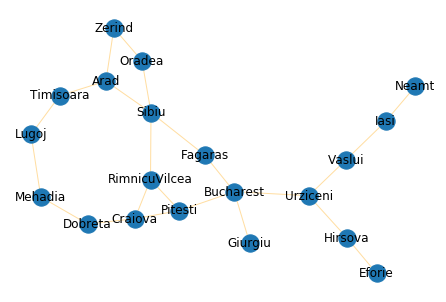

In [3]:
warnings.filterwarnings('ignore')

df_nodes = pd.read_csv('D:/Python/AI_Search/romania_nodes.csv')
df_edges = pd.read_csv('D:/Python/AI_Search/romania_edges.csv')

G = nx.Graph()
graph = Graph(directed=True)
for index, row in df_nodes.iterrows():
    G.add_node(row['nodes'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['weight'])])
    graph.add_edge(row['source'], row['target'], row['weight'])

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}    

nx.draw(G, **options)
ax = plt.gca()
plt.show()

In [4]:
start, goal, l = 'Arad', 'Bucharest', 5
print('Breadth First Search'); print('-------------------------'); 
bfs_path = graph.breadth_first_search(start, goal)
if (bfs_path): print('Path:', end=' '); Graph.print_path(bfs_path, goal); print();print()
print('Depth Limited Search'); print('-------------------------'); 
dlm_path = graph.depth_limited_search(start, goal, l)
if (dlm_path): print('Path:', end=' '); Graph.print_path(dlm_path, goal); print();print()
print('Uniform Cost Search'); print('-------------------------'); 
ucs_path, cost = graph.uniform_cost_search(start, goal)
if (ucs_path): print('Path:', end=' '); Graph.print_path(ucs_path, goal); print('\nCost:', cost)

Breadth First Search
-------------------------
Expand Node     | Fringe
-------------------------
-               | Arad
Arad            | Sibiu, Timisoara, Zerind
Zerind          | Oradea, Sibiu, Timisoara
Timisoara       | Lugoj, Oradea, Sibiu
Sibiu           | RimnicuVilcea, Fagaras, Lugoj, Oradea
Oradea          | RimnicuVilcea, Fagaras, Lugoj
Lugoj           | Mehadia, RimnicuVilcea, Fagaras
Fagaras         | Bucharest, Mehadia, RimnicuVilcea
RimnicuVilcea   | Craiova, Pitesti, Bucharest, Mehadia
Mehadia         | Dobreta, Craiova, Pitesti, Bucharest
Bucharest       | 
Path: Arad => Sibiu => Fagaras => Bucharest

Depth Limited Search
-------------------------
Depth limit = 5
Expand Node     | Fringe
-------------------------
-               | Arad
Arad            | Zerind, Timisoara, Sibiu
Sibiu           | Zerind, Timisoara, Oradea, Fagaras, RimnicuVilcea
RimnicuVilcea   | Zerind, Timisoara, Oradea, Fagaras, Pitesti, Craiova
Craiova         | Zerind, Timisoara, Oradea, Fagaras, P